# Notebook 2.4: Introduction to `PyTorch` ðŸ”¥

Probabilistic Machine Learning -- Spring 2023, UniTS

[PyTorch](https://pyth.org/) is a Python (and C++) framework for:
- Efficient numerical computing, with (support for) strong GPU acceleration;
- Automatic algorithmic differentiation (mainly in *reverse mode*, *tape-based*; but more recently also in *forward mode*);
- Development of deep neural models (a.k.a. *deep learning*);

It is also well integrated with the *scientific Python stack*.

The flexibility of PyTorch and its *Pythonic* interfaces make it the most widely adopted framework for research and development, both in academia and industry (especially industrial *R&D*).

In [1]:
# It all begins with...
import torch
import torch as th  # (Absolutely not necessary, but a shorthand)

import numpy as np  # For comparison

import matplotlib.pyplot as plt

import time

## Basic operation with `Tensor`s

The main building block of PyTorch's linear algebra capabilities is the `Tensor` class. A torch `Tensor` is the (loose) equivalent of NumPy's `ndarray` and most of the functionalities are the same as in NumPy. In general, it is always possible to perform the same logical/mathematical operations typical of NumPy on torch `Tensor`s

In [2]:
x = th.tensor([[1, 2, 3], [4, 5, 6]])
y = np.array([[1, 2, 3], [4, 5, 6]])

print(f"This is x:\n{x}")
print(f"This is y:\n{y}")

This is x:
tensor([[1, 2, 3],
        [4, 5, 6]])
This is y:
[[1 2 3]
 [4 5 6]]


In [3]:
# Shapes and sizes
x.size(), x.shape, y.shape

(torch.Size([2, 3]), torch.Size([2, 3]), (2, 3))

In [4]:
# (d)types
x.dtype, y.dtype

(torch.int64, dtype('int64'))

In [5]:
# (d)types "casting"
print("dtype of x before:", x.dtype)
x = x.float()
print("dtype of x after:", x.dtype)

dtype of x before: torch.int64
dtype of x after: torch.float32


In [6]:
# Or with more granular control
x = x.to(th.float16)
print("dtype of x:", x.dtype)

dtype of x: torch.float16


Note that you can build a tensor through the constructor `th.Tensor`. In this case, since `th.Tensor` is an alias for `th.FloatTensor`, the tensor you create will have type `th.float32`.

More info on data types [here](https://pyth.org/docs/stable/tensors.html).

Tensor slicing works exactly like in NumPy, by means of square brackets:

In [7]:
x = th.rand(2, 3, 2)
print(x)

tensor([[[0.9661, 0.1468],
         [0.0440, 0.7315],
         [0.3530, 0.6350]],

        [[0.4991, 0.8001],
         [0.9371, 0.5635],
         [0.8814, 0.2387]]])


In [8]:
print(x[0, 1, 1], "\n")

print(x[0, 1:, 1], "\n")

print(x[:, ::2, :])

tensor(0.7315) 

tensor([0.7315, 0.6350]) 

tensor([[[0.9661, 0.1468],
         [0.3530, 0.6350]],

        [[0.4991, 0.8001],
         [0.8814, 0.2387]]])


In [9]:
# Note: 0-dimensional tensors vs 1-dimensional tensors
print(x[0, 1, 1].shape, "\n")

print(th.tensor(3.14).shape)

print(th.tensor([3.14]).shape)

torch.Size([]) 

torch.Size([])
torch.Size([1])


In [10]:
# Use of `numel`
print(x.numel())

print(th.tensor(3.14).numel())

print(th.tensor([3.14]).numel())

12
1
1


### Tensor reshaping

Changing the shape of a tensor can be a crucial operation. To have an idea of its application, just think of `RGB` images.
These may be represented as $3\times H\times W$ tensors, where H and W stand for height and width of the image (in number of pixels). It is often needed to look at an image as a flattened (1D) vector of pixels:

In [11]:
img = th.stack((th.ones(8, 8), th.zeros(8, 8), th.ones(8, 8) / 2), dim=0)

img.reshape(
    3, 64
)  # note that reshaping is not in place, so this call does not change the actual shape of img

print(img.shape)
img2 = img.reshape(3, 64)
print(img2.shape)

torch.Size([3, 8, 8])
torch.Size([3, 64])


In [12]:
# plt.imshow(img.numpy())    # It errors: `TypeError: Invalid shape (3, 8, 8) for image data`

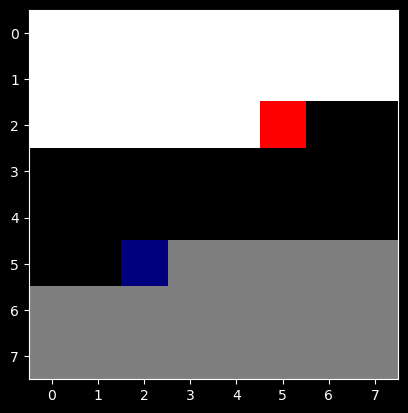

In [13]:
new_img = img.reshape(8, 8, 3)
plt.imshow(new_img.numpy())

**Note**

Difference between:
- `view`: operations on contiguous memory;
- `reshape`: operations on (non-)contiguous memory, using `view` wherever possible;
- `permute`: explicit reordering of dimensions and memory;
- `.contiguous()`: ensure that the tensor is stored in contiguous memory, with no other modification.

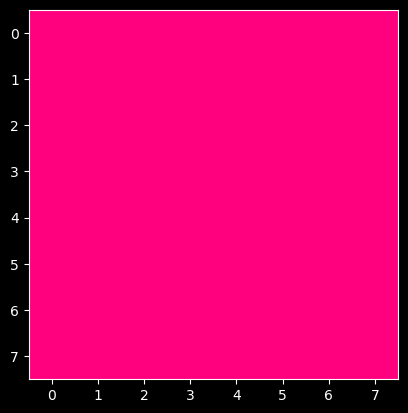

In [14]:
new_img = img.permute(1, 2, 0)
plt.imshow(new_img.numpy())

In [15]:
# See also:
z = th.tensor([[1, 2, 3], [4, 5, 6]])
y = z.t()
y.size()
# y.view(6)
y.contiguous().view(6)

tensor([1, 4, 2, 5, 3, 6])

### Linear algebra

In [16]:
x = th.rand(4, 5)
y = x.T  # matrix transposition; also .t()

print(x @ y)
print(x.matmul(y))
print(th.matmul(x, y))

tensor([[0.9481, 1.1642, 0.6245, 1.2485],
        [1.1642, 1.5995, 0.7921, 1.7560],
        [0.6245, 0.7921, 0.5116, 0.8172],
        [1.2485, 1.7560, 0.8172, 2.3189]])
tensor([[0.9481, 1.1642, 0.6245, 1.2485],
        [1.1642, 1.5995, 0.7921, 1.7560],
        [0.6245, 0.7921, 0.5116, 0.8172],
        [1.2485, 1.7560, 0.8172, 2.3189]])
tensor([[0.9481, 1.1642, 0.6245, 1.2485],
        [1.1642, 1.5995, 0.7921, 1.7560],
        [0.6245, 0.7921, 0.5116, 0.8172],
        [1.2485, 1.7560, 0.8172, 2.3189]])


Please note that the operator for matrix multiplication is `@`, not `*`, which indicates the Hadamard (element-wise) product instead.

In [17]:
x * x

tensor([[1.3238e-04, 6.3946e-01, 1.2321e-01, 3.0301e-02, 1.5497e-01],
        [1.4727e-01, 8.1417e-01, 1.8137e-01, 1.2000e-01, 3.3668e-01],
        [8.3307e-03, 2.7935e-01, 1.6567e-01, 5.6478e-02, 1.7778e-03],
        [5.4171e-02, 4.5338e-01, 2.9923e-01, 5.4899e-01, 9.6317e-01]])

Multiplying a matrix by itself is obviously equivalent to computing its power, and it can be done also by running one of the following commands:

In [18]:
print(th.pow(x, 2))
print(x**2)

tensor([[1.3238e-04, 6.3946e-01, 1.2321e-01, 3.0301e-02, 1.5497e-01],
        [1.4727e-01, 8.1417e-01, 1.8137e-01, 1.2000e-01, 3.3668e-01],
        [8.3307e-03, 2.7935e-01, 1.6567e-01, 5.6478e-02, 1.7778e-03],
        [5.4171e-02, 4.5338e-01, 2.9923e-01, 5.4899e-01, 9.6317e-01]])
tensor([[1.3238e-04, 6.3946e-01, 1.2321e-01, 3.0301e-02, 1.5497e-01],
        [1.4727e-01, 8.1417e-01, 1.8137e-01, 1.2000e-01, 3.3668e-01],
        [8.3307e-03, 2.7935e-01, 1.6567e-01, 5.6478e-02, 1.7778e-03],
        [5.4171e-02, 4.5338e-01, 2.9923e-01, 5.4899e-01, 9.6317e-01]])


As in NumPy, there exists a `dot` function to compute the scalar product between vectors. Note that differently from NumPy, in torch this is **not** equivalent to matrix multiplication, as it is intended to work only with 1D vectors.

In [19]:
v1 = x[:, 1]
v2 = x[:, 2]
print(v1.shape, v2.shape)

print(
    v1.dot(v2)
)  # in the case of 1D vectors, there is no difference between row and column vectors
print(v1.matmul(v2))
print(v1 @ v2)

torch.Size([4]) torch.Size([4])
tensor(1.2484)
tensor(1.2484)
tensor(1.2484)


If you want to do something fancier with two vectors, like multiplying a column by a row to obtain a matrix, you need to switch to 2D vectors by reshaping them.

When you reshape a tensor, you can leave one dimension unspecified (using -1), as it can be inferred automatically by th.

In [20]:
v1 = v1.reshape(-1, 1)  # column vector
v2 = v2.reshape(1, -1)  # row vector

print(v1.shape, v2.shape)
print(v1 @ v2)

torch.Size([4, 1]) torch.Size([1, 4])
tensor([[0.2807, 0.3406, 0.3255, 0.4374],
        [0.3167, 0.3843, 0.3673, 0.4936],
        [0.1855, 0.2251, 0.2151, 0.2891],
        [0.2364, 0.2868, 0.2741, 0.3683]])


In [21]:
# print(v1.dot(v2))    # this doesn't work! dot works only on 1D tensors

### Reduction operations

In [22]:
x = th.rand(2, 3, 2)
print(f"X: {x}")

X: tensor([[[0.0868, 0.3113],
         [0.7262, 0.8753],
         [0.5142, 0.5419]],

        [[0.6264, 0.5516],
         [0.0195, 0.6374],
         [0.8739, 0.4433]]])


In [23]:
x.sum(), th.sum(x)

(tensor(6.2080), tensor(6.2080))

In [24]:
x.mean(), th.mean(x)

(tensor(0.5173), tensor(0.5173))

In [25]:
x.argmin(), th.argmin(x)

(tensor(8), tensor(8))

It is sometimes useful to specify one or more dimensions to reduce (along which you want to perform your operations):

In [26]:
x.mean(dim=0)

tensor([[0.3566, 0.4314],
        [0.3729, 0.7564],
        [0.6941, 0.4926]])

In [27]:
x.argmax(dim=1)

tensor([[1, 1],
        [2, 1]])

In [28]:
x.sum(dim=(0, 1))

tensor([2.8472, 3.3609])

## Example: Linear regression

By using all the pieces we've seen till now, we can build our first *model* using PyTorch: a linear regressor, i.e.:

$$
y = XW + b
$$

which can also be simplified as:

$$
y = XW
$$

if we incorporate the bias $b$ inside $W$ and add to the $X$ a column of ones to the right.


We start by generating our data. We randomly sample $X$ as a $N\times P$ tensor, meaning that we have 1000 datapoints and 100 features and produce $y$ as:
$$
y=XM+\mathcal{N}(0,I)
$$
where $M$ is a randomly drawn projection vector (shape $P\times 1$, same as our weights).
We are adding some iid gaussian noise on the $y$ to avoid the interpolation regime, in which we could be fitting our data perfectly using a linear model.

In [29]:
N = 1000
P = 100
X = th.rand(N, P)
M = th.rand(P, 1)
y = X @ M + th.normal(th.zeros(N, 1), th.ones(N, 1))

We can add a column of ones to $X$ to include the bias:

In [30]:
X = th.cat([X, th.ones(N, 1)], dim=1)

The regression can be fit with classical statistical methods such as Ordinary Least Squares, and the optimal $W$ has the form:

$$
W^*=(X^TX)^{-1}X^Ty
$$


In [31]:
W_star = ((X.T @ X).inverse()) @ X.T @ y

To assess the quality of this fit we can evaluate the Mean Squared Error (MSE) between the original $y$ and the prediction:

In [32]:
th.nn.functional.mse_loss(X @ W_star, y)

tensor(0.9004)

## Why not just `numpy` (1): Automatic differentiation

Let's take a look at how ``autograd`` collects gradients. We create two tensors ``a`` and ``b`` with
``requires_grad=True``. This signals to ``autograd`` that every operation on them should be tracked.

In [33]:
a = th.tensor([2.0, 3.0], requires_grad=True)
b = th.tensor([6.0, 4.0], requires_grad=True)

We create another tensor ``Q`` from ``a`` and ``b``.

\begin{align}Q = 3a^3 - b^2\end{align}



In [34]:
Q = 3 * a**3 - b**2

We want to compute the gradients of ``Q`` w.r.t. ``a`` and ``b``, i.e.:

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}

We can do this by calling ``.backward()`` on any **scalar** function of ``Q``:

In [35]:
Q.sum().backward()

In [36]:
# check if collected gradients are correct
print(9 * a**2 == a.grad)
print(-2 * b == b.grad)

tensor([True, True])
tensor([True, True])


## Why not just `numpy` (2): GPU Acceleration

In [37]:
a = th.rand(1000, 1000)
b = th.rand(1000, 1000)
print(th.matmul(a, b))

tensor([[255.6709, 250.9626, 250.5085,  ..., 250.6259, 247.4780, 260.9814],
        [252.5892, 243.0260, 242.4091,  ..., 245.3009, 242.6892, 250.9973],
        [256.8336, 250.1258, 244.9961,  ..., 247.6424, 239.4887, 258.1257],
        ...,
        [254.9937, 239.6047, 242.8213,  ..., 246.0543, 241.6772, 255.3834],
        [258.1039, 248.5307, 245.7037,  ..., 250.8511, 247.7471, 252.2103],
        [249.8258, 244.6473, 244.7070,  ..., 247.4586, 237.3992, 255.7619]])


In [41]:
for _ in range(1000):
    r = th.matmul(a, b)

In [39]:
a_cuda = a.cuda()  # Or, generally: a.to(device)
b_cuda = b.cuda()  # Or, generally: a.to(device)
print(th.matmul(a_cuda, b_cuda))

tensor([[255.6709, 250.9626, 250.5086,  ..., 250.6259, 247.4780, 260.9814],
        [252.5891, 243.0261, 242.4091,  ..., 245.3009, 242.6891, 250.9973],
        [256.8337, 250.1258, 244.9962,  ..., 247.6424, 239.4886, 258.1257],
        ...,
        [254.9937, 239.6048, 242.8213,  ..., 246.0543, 241.6772, 255.3834],
        [258.1039, 248.5307, 245.7037,  ..., 250.8510, 247.7470, 252.2103],
        [249.8258, 244.6472, 244.7069,  ..., 247.4586, 237.3992, 255.7618]],
       device='cuda:0')


In [42]:
for _ in range(1000):
    r = th.matmul(a_cuda, b_cuda)